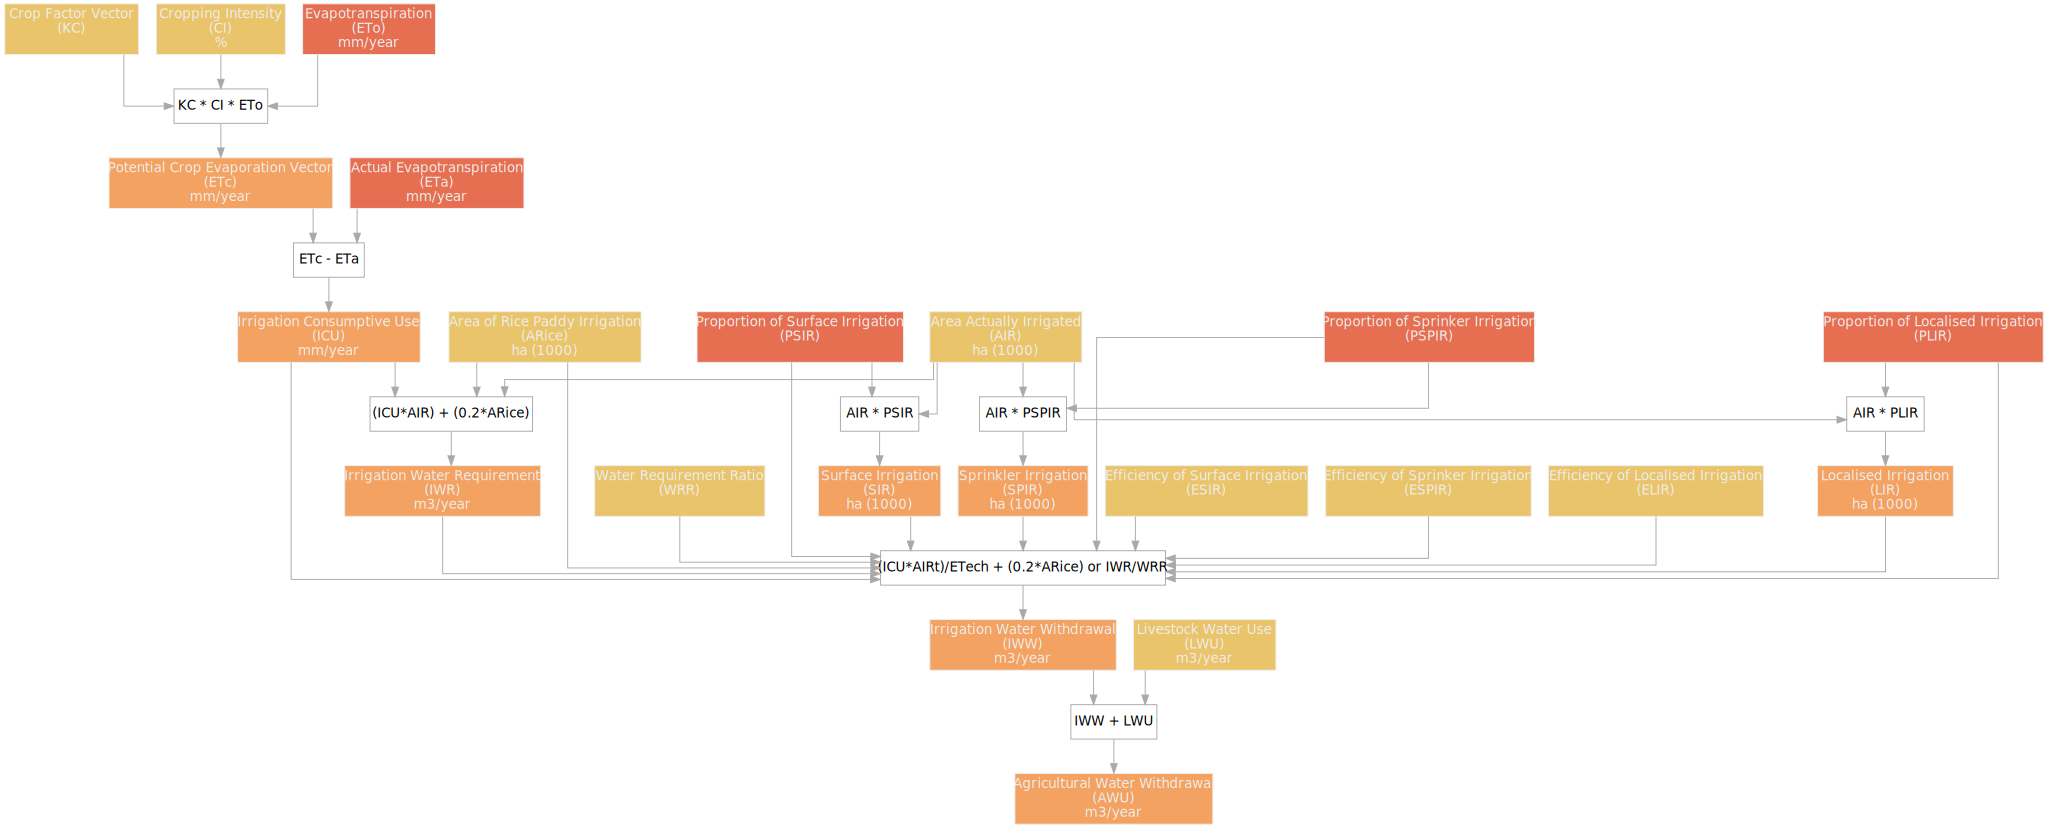

In [1]:
import numpy as np
from graphmodels.graphmodel import GraphModel

__publisher__ = 'Global Green Growth Institute'
__author__ = 'GGPM Team'
__model_lead__ = 'S. Gerrard'
__programmer__ = 'S. Zabrocki'

# all water metrics from FAO data needed to be converted to 10^9 before modelling

# Agricultural Water Use
# for future projections we can assume there will not be a change in type of crops.
IWW_nodes = [{'type': 'parameter', 'unit': '',
              'name': 'Crop Factor Vector', 'id': 'KC'},
             {'type': 'parameter', 'unit': '%',
              'name': 'Cropping Intensity', 'id': 'CI'},
             {'type': 'input', 'unit': 'mm/year',
              'name': 'Evapotranspiration', 'id': 'ETo'},
             {'type': 'variable',
              'name': 'Potential Crop Evaporation Vector',
              'unit': 'mm/year',
              'in': ['KC', 'ETo', 'CI'],
              'computation': {'name': 'KC * CI * ETo', 'formula': lambda X: X['KC'] * X['CI'] * X['ETo']},
              'id': 'ETc'},
             {'type': 'input',
              'unit': 'mm/year',
              'name': 'Actual Evapotranspiration',
              'id': 'ETa'},
             {'type': 'variable',
              'name': 'Irrigation Consumptive Use',
              'unit': 'mm/year',
              'in': ['ETc', 'ETa'],
              'computation': {'name': 'ETc - ETa', 'formula': lambda X: X['ETc'] - X['ETa']},
              'id': 'ICU'},
             {'type': 'parameter',
              'unit': 'ha (1000)',
              'name': 'Area Actually Irrigated',
              'id': 'AIR'},
             {'type': 'parameter',
              'unit': 'ha (1000)',
              'name': 'Area of Rice Paddy Irrigation',
              'id': 'ARice'},
             {'type': 'variable',
              'name': ' Irrigation Water Requirement',
              'unit': 'm3/year',
              'in': ['ICU', 'AIR', 'ARice'],
              'computation': {'name': '(ICU*AIR) + (0.2*ARice) ', 'formula': lambda X: sum((X['ICU'] * X['AIR']) + X['ARice']*0.2)},
              'id': 'IWR'},
             {'type': 'parameter',
              'name': 'Water Requirement Ratio',
              'unit': '',
              'id': 'WRR'},
             # Type of Irrigation Scenario
             {'type': 'input',
              'unit': '',
              'name': 'Proportion of Surface Irrigation',
              'id': 'PSIR'},
             {'type': 'input',
              'unit': '',
              'name': 'Proportion of Sprinker Irrigation',
              'id': 'PSPIR'},
             {'type': 'input',
              'unit': '',
              'name': 'Proportion of Localised Irrigation',
              'id': 'PLIR'},
             {'type': 'parameter',
              'unit': '',
              'name': 'Efficiency of Surface Irrigation',
              'id': 'ESIR'},

             {'type': 'parameter',
              'unit': '',
              'name': 'Efficiency of Sprinker Irrigation',
              'id': 'ESPIR'},
             {'type': 'parameter',
              'unit': '',
              'name': 'Efficiency of Localised Irrigation',
              'id': 'ELIR'},
             {'type': 'variable',
              'name': 'Surface Irrigation',
              'unit': 'ha (1000)',
              'in': ['AIR', 'PSIR'],
              'computation': {'name': 'AIR * PSIR', 'formula': lambda X: (X['AIR'] * X['PSIR'])},
              'id': 'SIR'},
             {'type': 'variable',
              'name': 'Sprinkler Irrigation',
              'unit': 'ha (1000)',
              'in': ['AIR', 'PSPIR'],
              'computation': {'name': 'AIR * PSPIR', 'formula': lambda X: (X['AIR'] * X['PSPIR'])},
              'id': 'SPIR'},
             {'type': 'variable',
              'name': 'Localised Irrigation',
              'unit': 'ha (1000)',
              'in': ['AIR', 'PLIR'],
              'computation': {'name': 'AIR * PLIR', 'formula': lambda X: (X['AIR'] * X['PLIR'])},
              'id': 'LIR'},
             # Irrigation Water Withdrawal
             # to improve
             {'type': 'variable',
              'name': ' Irrigation Water Withdrawal',
              'unit': 'm3/year',
              'in': ['ICU', 'SIR', 'SPIR', 'LIR', 'ARice', 'ESIR', 'ESPIR', 'ELIR', 'IWR', 'WRR', 'PSIR', 'PSPIR', 'PLIR'],
              'computation': {'name': '(ICU*AIRt)/ETech + (0.2*ARice) or IWR/WRR', 'formula': lambda X: sum((X['ICU'] * X['SIR']/X['ESIR']) \
                                                                                                            + (X['ICU'] * X['SPIR']/X['ESPIR']) \
                                                                                                            + (X['ICU'] * X['LIR']/X['ELIR']) \
                                                                                                            + X['ARice']*0.2) \
                                                                                                            if (X['PSIR']+X['PSPIR']+X['PLIR']) > 0 and (X['PSIR']+X['PSPIR']+X['PLIR']) <= 1 \
                                                                                                            else X['IWR']/X['WRR']},
              'id': 'IWW'},
             {'type': 'parameter',
              'name': 'Livestock Water Use',
              'unit': 'm3/year',
              'id': 'LWU'},
             {'type': 'variable',
              'name': 'Agricultural Water Withdrawal',
              'unit': 'm3/year',
              'in': ['IWW', 'LWU'],
              'computation': {'name': 'IWW + LWU', 'formula': lambda X: X['IWW'] + X['LWU']},
              'id': 'AWU'},
             ]

GraphModel(IWW_nodes).draw()


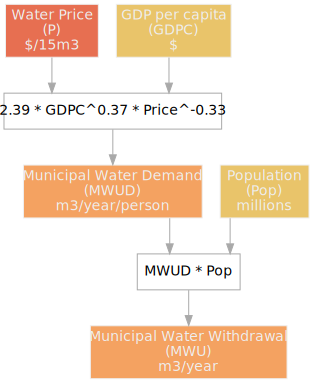

In [2]:
# Municipal Water Use
MWU_nodes = [{'type': 'input',
              'name': 'Water Price',
              'unit': '$/15m3',
              'id': 'P'},
             {'type': 'parameter',
              'name': 'GDP per capita',
              'unit': '$',
              'id': 'GDPC'},
             {'type': 'variable',
              'name': 'Municipal Water Demand',
              'unit': 'm3/year/person',
              'in': ['P', 'GDPC'],
              'computation': {'name': '2.39 * GDPC^0.37 * Price^-0.33 ', 'formula': lambda X: 2.39 * X['GDPC']**0.37 * X['P']**-0.33},
              'id': 'MWUD'},
             {'type': 'parameter',
              'name': 'Population',
              'unit': 'millions',
              'id': 'Pop'},
             {'type': 'variable',
              'name': 'Municipal Water Withdrawal',
              'unit': 'm3/year',
              'in': ['Pop', 'MWUD'],
              'computation': {'name': 'MWUD * Pop ', 'formula': lambda X: X['MWUD'] * X['Pop']},
              'id': 'MWU'},
             ]

GraphModel(MWU_nodes).draw()


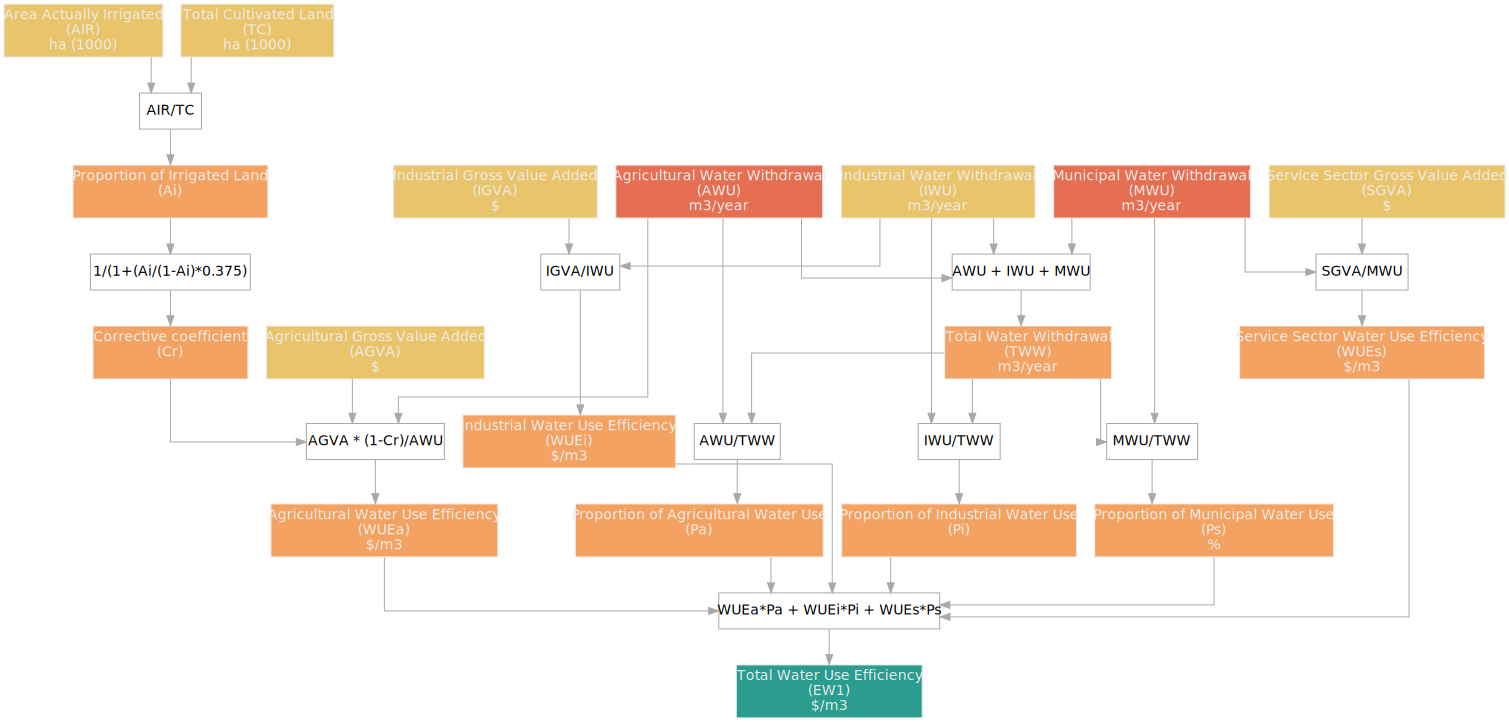

In [3]:
EW1_nodes = [
    # Industrial Water Use
    {'type': 'parameter',
     'name': 'Industrial Water Withdrawal',
     'unit': 'm3/year',
     'id': 'IWU'},
    {'type': 'parameter',
     'unit': 'ha (1000)',
     'name': 'Area Actually Irrigated',
     'id': 'AIR'},
    {'type': 'input',
        'name': 'Municipal Water Withdrawal',
        'unit': 'm3/year',
        'id': 'MWU'},
    {'type': 'input',
     'name': 'Agricultural Water Withdrawal',
     'unit': 'm3/year',
     'id': 'AWU'},

    # Total Water Withdrawal
    {'type': 'variable',
        'name': 'Total Water Withdrawal',
        'unit': 'm3/year',
        'in': ['MWU', 'AWU', 'IWU'],
        'computation': {'name': 'AWU + IWU + MWU', 'formula': lambda X: X['AWU'] + X['IWU'] + X['MWU']},
        'id': 'TWW'},

    # Agricultural Water Use Efficiency
    {'type': 'parameter',
        'unit': 'ha (1000)',
        'name': 'Total Cultivated Land',
        'id': 'TC'},
    {'type': 'variable',
        'name': 'Proportion of Irrigated Land',
        'unit': '',
        'in': ['AIR', 'TC'],
        'computation': {'name': 'AIR/TC', 'formula': lambda X: X['AIR'] / X['TC']},
        'id': 'Ai'},
    {'type': 'variable',
     'name': 'Corrective coefficient',
     'unit': '',
     'in': ['Ai'],
     'computation': {'name': '1/(1+(Ai/(1-Ai)*0.375)', 'formula': lambda X: 1/(1 + (X['Ai']/(1-X['Ai'])*0.375))},
     'id': 'Cr'},
    {'type': 'parameter',
     'name': 'Agricultural Gross Value Added',
     'unit': '$',
     'id': 'AGVA'},
    {'type': 'variable',
     'name': 'Agricultural Water Use Efficiency',
     'unit': '$/m3',
     'in': ['AGVA', 'Cr', "AWU"],
     'computation': {'name': 'AGVA * (1-Cr)/AWU', 'formula': lambda X: X['AGVA'] * (1-X['Cr'])/X['AWU']},
     'id': 'WUEa'},
    # Industrial Water Use Efficiency
    {'type': 'parameter',
     'name': 'Industrial Gross Value Added',
     'unit': '$',
     'id': 'IGVA'},
    {'type': 'variable',
     'name': 'Industrial Water Use Efficiency',
     'unit': '$/m3',
     'in': ['IGVA', 'IWU'],
     'computation': {'name': 'IGVA/IWU', 'formula': lambda X: X['IGVA'] / X['IWU']},
     'id': 'WUEi'},
    # Municipal/Service sector water use efficiency
    {'type': 'parameter',
     'name': 'Service Sector Gross Value Added',
     'unit': '$',
     'id': 'SGVA'},
    {'type': 'variable',
     'name': 'Service Sector Water Use Efficiency',
     'unit': '$/m3',
     'in': ['SGVA', 'MWU'],
     'computation': {'name': 'SGVA/MWU', 'formula': lambda X: X['SGVA'] / X['MWU']},
     'id': 'WUEs'},
    # EW1 calculation
    {'type': 'variable',
     'name': 'Proportion of Agricultural Water Use',
     'unit': '',
     'in': ['AWU', 'TWW'],
     'computation': {'name': 'AWU/TWW', 'formula': lambda X: X['AWU'] / X['TWW']},
     'id': 'Pa'},
    {'type': 'variable',
     'name': 'Proportion of Industrial Water Use',
     'unit': '',
     'in': ['IWU', 'TWW'],
     'computation': {'name': 'IWU/TWW', 'formula': lambda X: X['IWU'] / X['TWW']},
     'id': 'Pi'},
    {'type': 'variable',
        'name': 'Proportion of Municipal Water Use',
        'unit': '%',
        'in': ['MWU', 'TWW'],
        'computation': {'name': 'MWU/TWW', 'formula': lambda X: X['MWU'] / X['TWW']},
        'id': 'Ps'},
    {'type': 'output',
     'name': 'Total Water Use Efficiency',
     'unit': '$/m3',
     'in': ['WUEa', 'Pa', 'WUEi', 'Pi', 'WUEs', 'Ps'],
     'computation': {'name': 'WUEa*Pa + WUEi*Pi + WUEs*Ps', 'formula': lambda X: X['WUEa'] * X['Pa'] + X['WUEi'] * X['Pi'] + X['WUEs'] * X['Ps']},
     'id': 'EW1'}

]
GraphModel(EW1_nodes).draw()

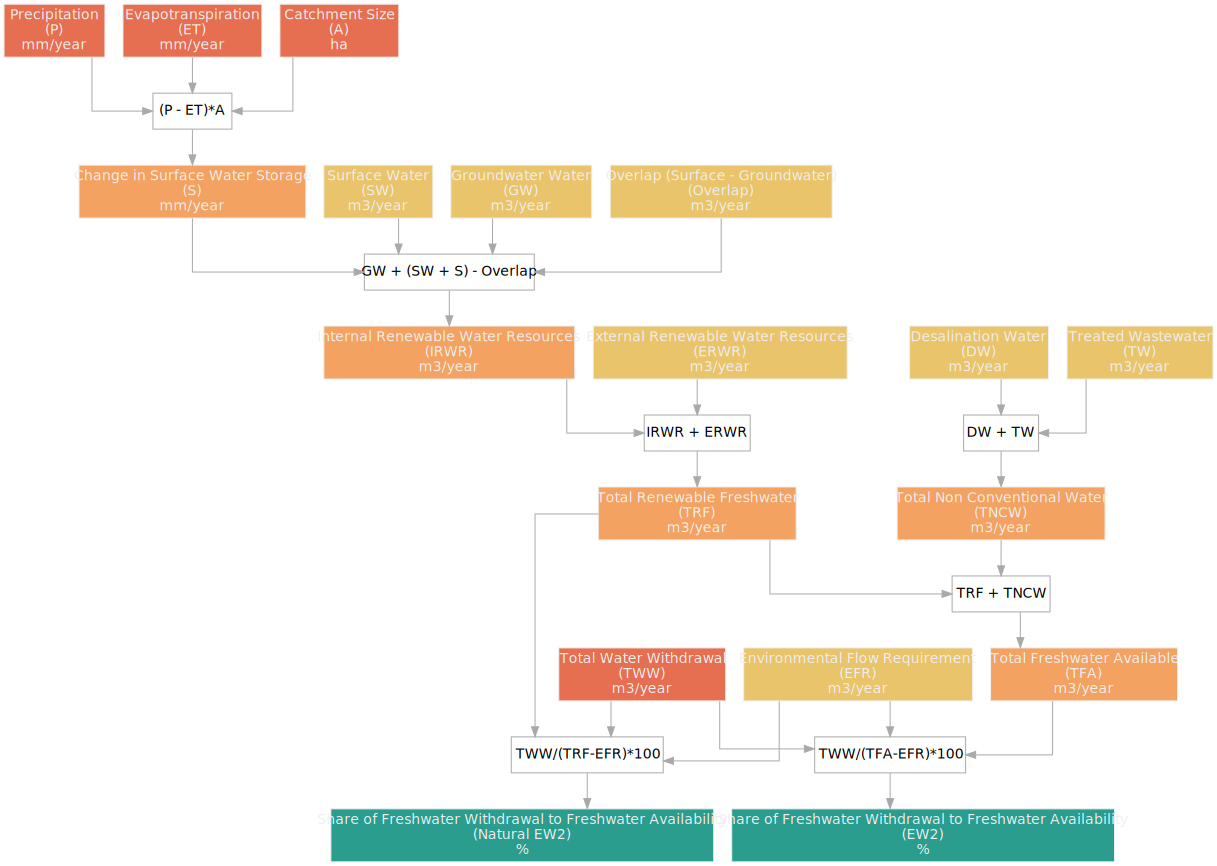

In [4]:
EW2_nodes = [
    {'type': 'input',
     'unit': 'mm/year',
        'name': 'Precipitation',
     'id': 'P'},
    {'type': 'input',
     'unit': 'mm/year',
        'name': 'Evapotranspiration',
     'id': 'ET'},
    {'type': 'input',
     'unit': 'ha',
        'name': 'Catchment Size',
     'id': 'A'},
    {'type': 'variable',
     'name': 'Change in Surface Water Storage',
     'unit': 'mm/year',
     'in': ['P', 'ET', 'A'],
     'computation': {'name': '(P - ET)*A', 'formula': lambda X: (X['P'] - X['ET']) * X['A']},
     'id': 'S'},
    {'type': 'parameter',
        'unit': 'm3/year',
        'name': 'Surface Water',
     'id': 'SW'},
    {'type': 'parameter',
        'unit': 'm3/year',
        'name': 'Groundwater Water',
     'id': 'GW'},
    {'type': 'parameter',
        'unit': 'm3/year',
        'name': 'Overlap (Surface - Groundwater)',
     'id': 'Overlap'},
    {'type': 'variable',
     'name': 'Internal Renewable Water Resources',
     'unit': 'm3/year',
     'in': ['SW', 'GW', 'Overlap', 'S'],
     'computation': {'name': 'GW + (SW + S) - Overlap', 'formula': lambda X: X['GW'] + (X['SW'] - X['S']) - X['Overlap']},
     'id': 'IRWR'},
    {'type': 'parameter',
        'unit': 'm3/year',
        'name': 'External Renewable Water Resources',
     'id': 'ERWR'},
    {'type': 'variable',
     'name': 'Total Renewable Freshwater',
     'unit': 'm3/year',
     'in': ['IRWR', 'ERWR'],
     'computation': {'name': 'IRWR + ERWR', 'formula': lambda X: X['IRWR'] + X['ERWR']}, 'id': 'TRF'},
    # Non conventional water
    {'type': 'parameter',
     'unit': 'm3/year',
        'name': 'Desalination Water',
     'id': 'DW'},
    {'type': 'parameter',
        'unit': 'm3/year',
        'name': 'Treated Wastewater',
        'id': 'TW'},
    {'type': 'variable',
     'name': 'Total Non Conventional Water',
     'unit': 'm3/year',
     'in': ['DW', 'TW'],
     'computation': {'name': 'DW + TW', 'formula': lambda X: X['DW'] + X['TW']}, 'id': 'TNCW'},
    {'type': 'variable',
        'name': 'Total Freshwater Available',
        'unit': 'm3/year',
        'in': ['TRF', 'TNCW'],
        'computation': {'name': 'TRF + TNCW', 'formula': lambda X: X['TRF'] + X['TNCW']}, 'id': 'TFA'},
    # calculation of EW 2
    {'type': 'input',
        'unit': 'm3/year',
        'name': 'Total Water Withdrawal',
     'id': 'TWW'},
    {'type': 'parameter',
     'unit': 'm3/year',
        'name': 'Environmental Flow Requirement',
     'id': 'EFR'},
    # inclusion of both natural and non-conventional water sources
    {'type': 'output',
     'name': 'Share of Freshwater Withdrawal to Freshwater Availability',
     'unit': '%',
     'in': ['TFA', 'TWW', 'EFR'],
     'computation': {'name': 'TWW/(TFA-EFR)*100', 'formula': lambda X: X['TWW'] / (X['TFA'] - X['EFR']) * 100}, 'id': 'EW2'},
    # only natural water sources
    {'type': 'output',
     'name': 'Share of Freshwater Withdrawal to Freshwater Availability',
     'unit': '%',
     'in': ['TRF', 'TWW', 'EFR'],
     'computation': {'name': 'TWW/(TRF-EFR)*100', 'formula': lambda X: X['TWW'] / (X['TRF'] - X['EFR']) * 100}, 'id': 'Natural EW2'},
]

GraphModel(EW2_nodes).draw()

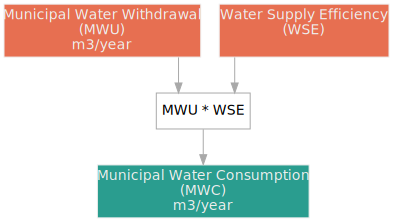

In [5]:
MWC_nodes = [
    {'type': 'input',
     'name': 'Municipal Water Withdrawal',
     'unit': 'm3/year',
     'id': 'MWU'},
    {'type': 'input',
     'name': 'Water Supply Efficiency',
     'unit': '',
     'id': 'WSE'},
    {'type': 'output',
        'name': 'Municipal Water Consumption',
        'unit': 'm3/year',
        'in': ['MWU', 'WSE'],
        'id': 'MWC',
        'computation': {'name': 'MWU * WSE', 'formula': lambda X: X['MWU'] * X['WSE']}},
]


GraphModel(MWC_nodes).draw()